# Bonus

You must train a model that predicts `charges` with an $R^2$ Score of $0.85$ or above with the features `age`,`bmi`, and `smoker`.


<details>
<summary> 💡 Hint </summary>

\
Machine Learning algorithms are sensitive to the scale of features. They will attribute more importance to large scale features, which can negatively impacted their performance.

</details>


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
client_df = pd.read_csv('data/insurance_charges.csv')
client_df.sort_values(by='charges').tail(20)

,age,sex,bmi,children,smoker,region,charges
951,51,male,42.900,2,True,southeast,47462.89400
55,58,male,36.955,2,True,northwest,47496.49445
288,59,female,36.765,1,True,northeast,47896.79135
328,64,female,33.800,1,True,southwest,47928.03000
39,60,male,39.900,0,True,southwest,48173.36100
330,61,female,36.385,1,True,northeast,48517.56315
281,54,male,40.565,3,True,northeast,48549.17835
901,60,male,40.920,0,True,southeast,48673.55880
530,57,male,42.130,1,True,southeast,48675.51770
175,63,female,37.700,0,True,southwest,48824.45000


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Prepare X and y
features = ['bmi', 'age', 'children', 'smoker']
target_name = 'charges'
# Split into Train/Test
X = client_df[features]
y = client_df[target_name]

# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 100)
# Instanciate the model
model = LinearRegression(normalize=True)
# Train the model on the Training data
model.fit(X_train, y_train)
# Score the model on the Testing data
model.score(X_test, y_test)

0.7801892001961761

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = s_scaler.fit_transform(client_df[['age', 'bmi']])

NameError: name 's_scaler' is not defined

In [16]:
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 100)
reg = linear_model.Ridge(alpha=.1)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.7802107803802947

In [14]:
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.7801899413939568

In [17]:
from sklearn.linear_model import TweedieRegressor
reg = TweedieRegressor(power=1, alpha=0.5, link='log')
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.7798060074901654

/home/florent/.pyenv/versions/3.8.5/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

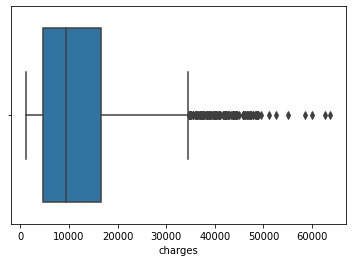

In [21]:
import seaborn as sns
sns.boxplot(client_df['charges'])

In [27]:
from scipy.stats import zscore
print (zscore([1, 2, 3]))

[-1.22474487  0.          1.22474487]


In [47]:
import scipy.stats as sts
from scipy.stats import zscore
z_scores = sts.zscore(client_df[['bmi', 'charges']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2.5).all(axis=1)
new_df = client_df[filtered_entries]
new_df.sort_values(by='charges').tail(20)

,age,sex,bmi,children,smoker,region,charges
1152,43,female,32.560,3,True,southeast,40941.28540
856,48,female,33.110,0,True,southeast,40974.16490
958,43,male,34.960,1,True,northeast,41034.22140
254,50,male,31.825,0,True,northeast,41097.16175
1218,46,female,34.600,1,True,southwest,41661.60200
1090,47,male,36.190,0,True,southeast,41676.08110
338,50,male,32.300,1,True,northeast,41919.09700
1111,38,male,38.390,3,True,southeast,41949.24410
956,54,male,30.800,1,True,southeast,41999.52000
852,46,female,35.530,0,True,northeast,42111.66470


In [44]:
X = new_df[features]
y = new_df[target_name]

# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 100)
# Instanciate the model
model = LinearRegression()
# Train the model on the Training data
model.fit(X_train, y_train)
# Score the model on the Testing data
model.score(X_test, y_test)

0.6674384206404982

# 🏁